# EDA

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD


# ignore warnings 
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# path to the directory
RAVD = "dataset/audio_speech_actors_01-24/"
RAVD

'dataset/audio_speech_actors_01-24/'

In [3]:
# List all folders in the directory
folders = os.listdir(RAVD)
folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [4]:
def get_audio_info(file_path):
    audio, sr = librosa.load(file_path, sr=None)  
    duration = librosa.get_duration(y=audio, sr=sr)  
    return duration, sr

RAVD_list = os.listdir(RAVD)
file_emotion = []
file_statement = []
file_path = []
file_duration = []
file_sampling_rate = []

for dir in RAVD_list:
    actor = os.listdir(os.path.join(RAVD, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_statement.append(int(part[4]))
        file_path.append(os.path.join(RAVD, dir, file))
        
        # Get duration and sampling rate information
        duration, sr = get_audio_info(os.path.join(RAVD, dir, file))
        file_duration.append(duration)
        file_sampling_rate.append(sr)

# Create a DataFrame
RAVD_df = pd.DataFrame({
    "Emotions": file_emotion,
    "Statement": file_statement,
    "Path": file_path,
    "Duration": file_duration,
    "SamplingRate": file_sampling_rate
})

# changing integers to actual emotions.
RAVD_df["Emotions"].replace({
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}, inplace=True)

# Display the DataFrame
print(RAVD_df.head(5))

  Emotions  Statement                                               Path  \
0  neutral          1  dataset/audio_speech_actors_01-24/Actor_01\03-...   
1  neutral          1  dataset/audio_speech_actors_01-24/Actor_01\03-...   
2  neutral          2  dataset/audio_speech_actors_01-24/Actor_01\03-...   
3  neutral          2  dataset/audio_speech_actors_01-24/Actor_01\03-...   
4     calm          1  dataset/audio_speech_actors_01-24/Actor_01\03-...   

   Duration  SamplingRate  
0  3.303292         48000  
1  3.336667         48000  
2  3.269917         48000  
3  3.169833         48000  
4  3.536854         48000  


In [5]:
print("Shape:",RAVD_df.shape)

Shape: (1440, 5)


In [6]:
print("Size of the dataset:", len(RAVD_df))

Size of the dataset: 1440


In [7]:
print("Number of audio files:", len(RAVD_df['Path'].unique()))

Number of audio files: 1440


In [8]:
print("Mean Duration:", RAVD_df['Duration'].mean())

Mean Duration: 3.7006648148148145


In [9]:
print("Mean Sampling Rate:", RAVD_df['SamplingRate'].mean())

Mean Sampling Rate: 48000.0


In [10]:
# Check for missing values
missing_values = RAVD_df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Emotions        0
Statement       0
Path            0
Duration        0
SamplingRate    0
dtype: int64


In [11]:
RAVD_df.groupby(['Emotions','Statement']).size().unstack()

Statement   1   2
Emotions         
angry      96  96
calm       96  96
disgust    96  96
fear       96  96
happy      96  96
neutral    48  48
sad        96  96
surprise   96  96

In [12]:
# Function to get the list of actors
def get_actors(RAVD):
    actors = [actor for actor in os.listdir(RAVD) if os.path.isdir(os.path.join(RAVD, actor))]
    return actors
actors = get_actors(RAVD)
print("Number of Actors:", len(actors))

Number of Actors: 24


In [13]:
# Function to get the number of records for each actor
def get_records_count(actor_path):
    files = os.listdir(actor_path)
    return len(files)
def get_avg_record_length(actor_path):
    total_length = 0
    files = os.listdir(actor_path)
    
    for file in files:
        total_length += 1

    return total_length / len(files)

In [14]:
for actor in actors:
    actor_path = os.path.join(RAVD, actor)
    avg_record_length = get_avg_record_length(actor_path)
    records_count = get_records_count(actor_path)
    print(f"\nActor {actor}:")
    print("Number of Records:", records_count)
    print("Avg Record Length:", avg_record_length)


Actor Actor_01:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_02:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_03:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_04:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_05:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_06:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_07:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_08:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_09:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_10:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_11:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_12:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_13:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_14:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_15:
Number of Records: 60
Avg Record Length: 1.0

Actor Actor_16:
Number of Records: 60
Avg Record Length: 1.0

Actor A

In [15]:
print("Count of Emotions:", len(RAVD_df['Emotions'].unique()))

Count of Emotions: 8


In [16]:
print(RAVD_df['Emotions'].value_counts())

calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: Emotions, dtype: int64


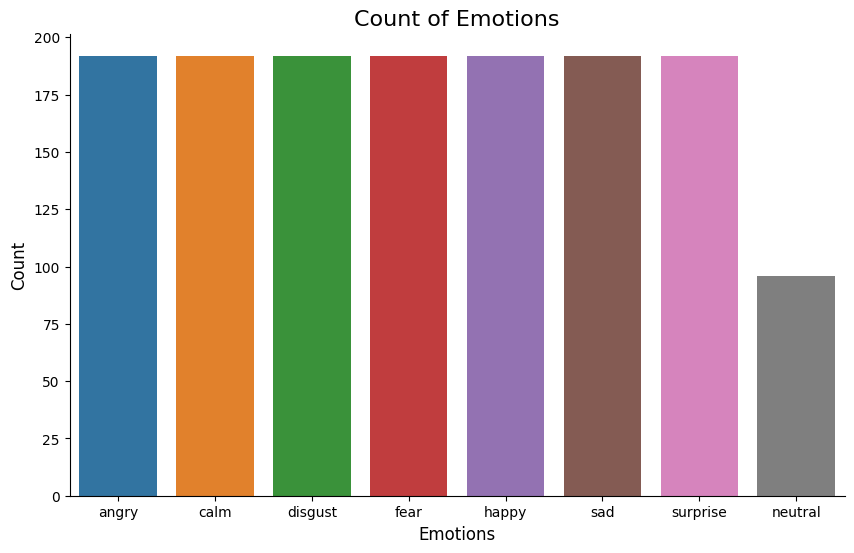

In [17]:
# Convert 'Emotions' column to categorical data type
RAVD_df['Emotions'] = pd.Categorical(RAVD_df['Emotions'])
# Plot count of emotions
plt.figure(figsize=(10, 6))
plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=RAVD_df, order=RAVD_df['Emotions'].value_counts().index)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [18]:
dir_list = os.listdir(RAVD)
dir_list.sort()
emotion = []
gender = []
path = []

for i in dir_list:
    fname = os.listdir(RAVD + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        
        # Check if the split resulted in enough parts
        if len(part) >= 7:
            emotion.append(int(part[2]))
            temp = int(part[6])
            
            if temp % 2 == 0:
                temp = "female"
            else:
                temp = "male"
                
            gender.append(temp)
            path.append(RAVD + i + '/' + f)
        else:
            print(f"Skipping file {f} in directory {i} due to unexpected format.")
# Create a DataFrame
RAVD_df = pd.DataFrame(emotion)
RAVD_df = RAVD_df.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'})
RAVD_df = pd.concat([pd.DataFrame(gender), RAVD_df], axis=1)
RAVD_df.columns = ['gender', 'emotion']
RAVD_df['labels'] = RAVD_df.gender + '_' + RAVD_df.emotion
RAVD_df['source'] = 'RAVDESS'
RAVD_df = pd.concat([RAVD_df, pd.DataFrame(path, columns=['path'])], axis=1)
RAVD_df = RAVD_df.drop(['gender', 'emotion'], axis=1)

# Display the counts of different labels
print(RAVD_df.labels.value_counts())

male_calm           96
male_happy          96
male_sad            96
male_angry          96
male_fearful        96
male_disgust        96
male_surprised      96
female_calm         96
female_happy        96
female_sad          96
female_angry        96
female_fearful      96
female_disgust      96
female_surprised    96
male_neutral        48
female_neutral      48
Name: labels, dtype: int64


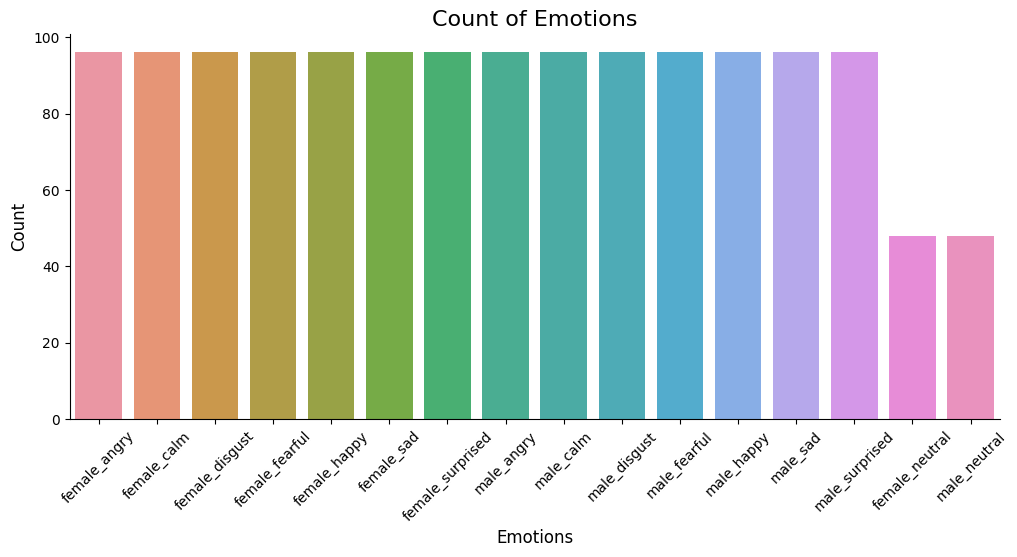

In [19]:
# Convert 'labels' column to categorical data type
RAVD_df['labels'] = pd.Categorical(RAVD_df['labels'])
# Plot count of emotions
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(x='labels', data=RAVD_df, order=RAVD_df['labels'].value_counts().index)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


# Plotting waveplots and spectograms for audio signals

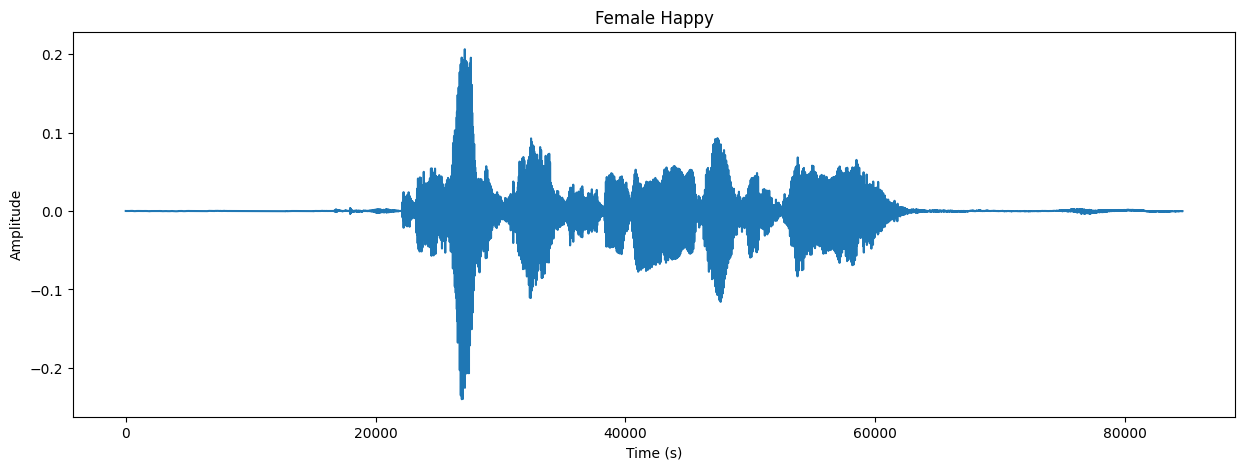

In [20]:
# Female Happy
path = RAVD + 'Actor_08/03-01-03-02-02-01-08.wav'
data, sampling_rate = librosa.load(path)

# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.title('Female Happy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Display the plot
plt.show()

# Let's play the audio
ipd.Audio(path)

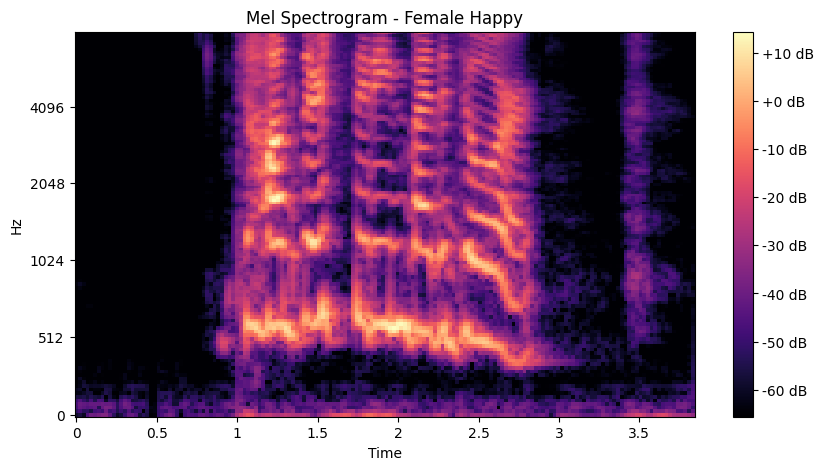

In [21]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Happy')
plt.colorbar(format='%+2.0f dB')

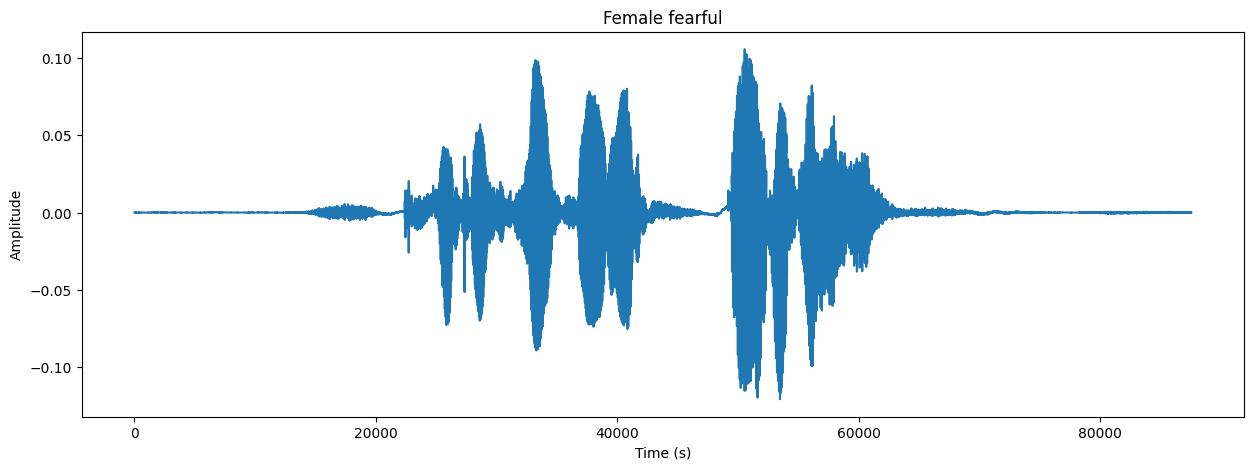

In [22]:
#Female Fear
path = RAVD +'Actor_08/03-01-06-01-01-01-08.wav'
data, sampling_rate = librosa.load(path)

# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.title('Female fearful')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Display the plot
plt.show()

# Let's play the audio
ipd.Audio(path)


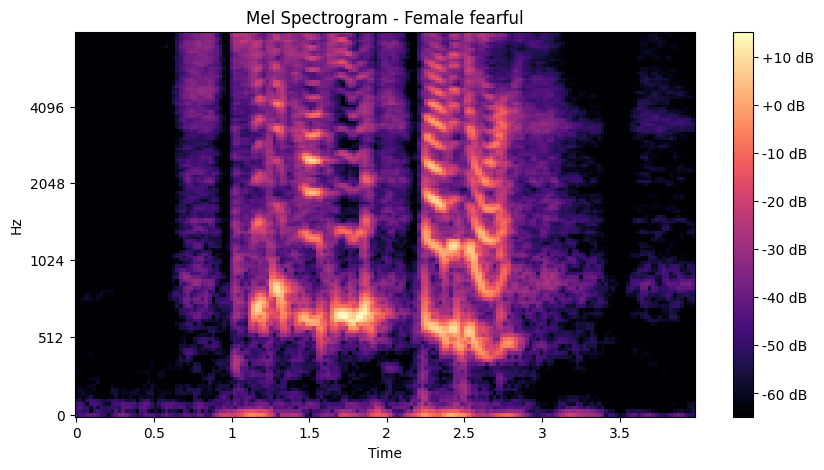

In [23]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female fearful')
plt.colorbar(format='%+2.0f dB');

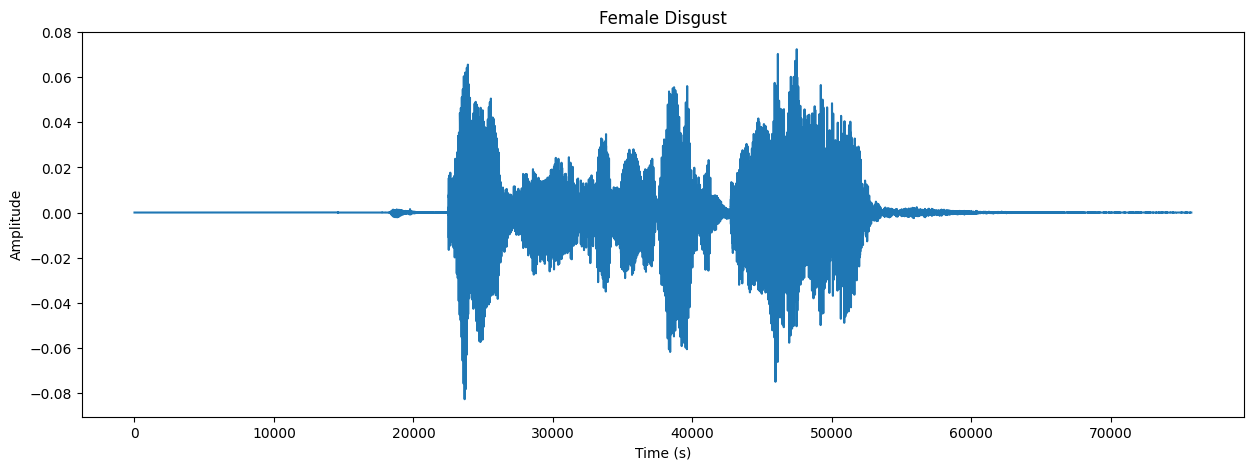

In [24]:
# Female Disgust
path =RAVD +'Actor_20/03-01-08-02-02-02-20.wav'
data, sampling_rate = librosa.load(path)

# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.title('Female Disgust')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Display the plot
plt.show()

# Let's play the audio
ipd.Audio(path)


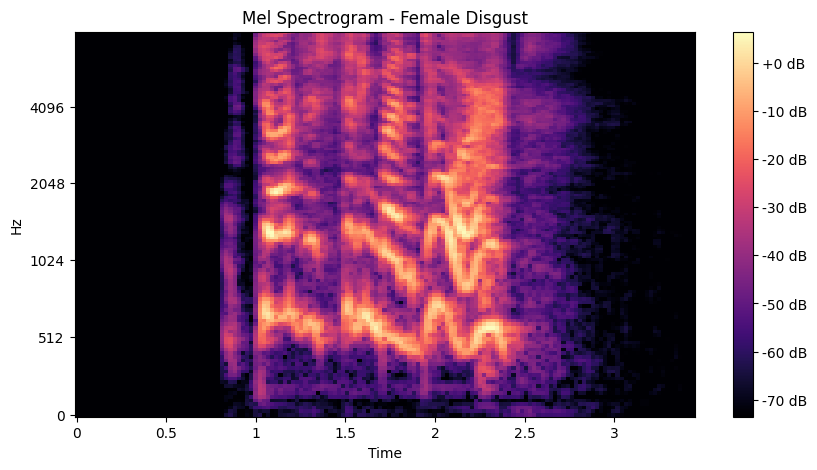

In [25]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Disgust')
plt.colorbar(format='%+2.0f dB');

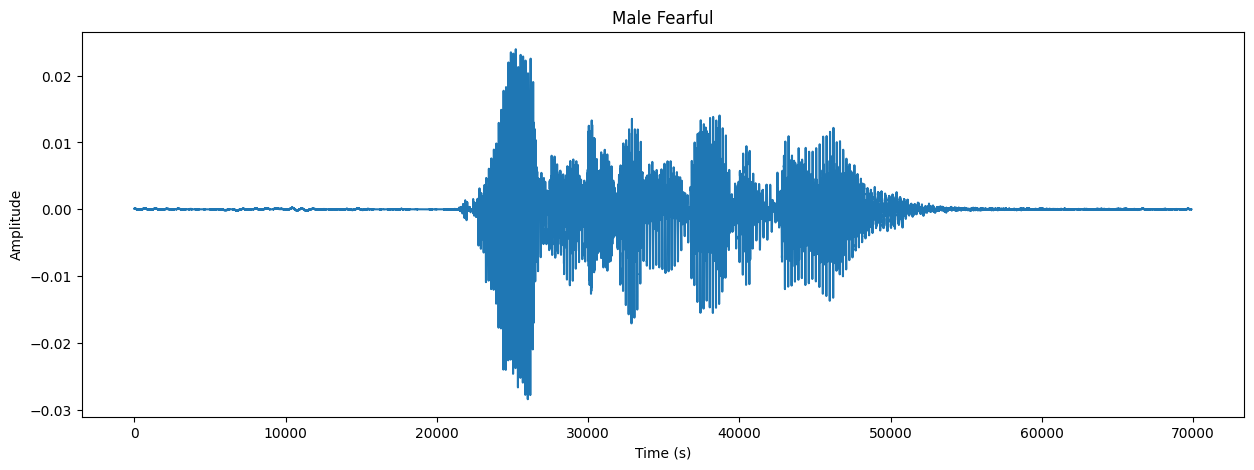

In [26]:
# Male fearful
path =RAVD + 'Actor_19/03-01-04-01-02-01-19.wav'
data, sampling_rate = librosa.load(path)

# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.title('Male Fearful')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Display the plot
plt.show()

# Let's play the audio
ipd.Audio(path)


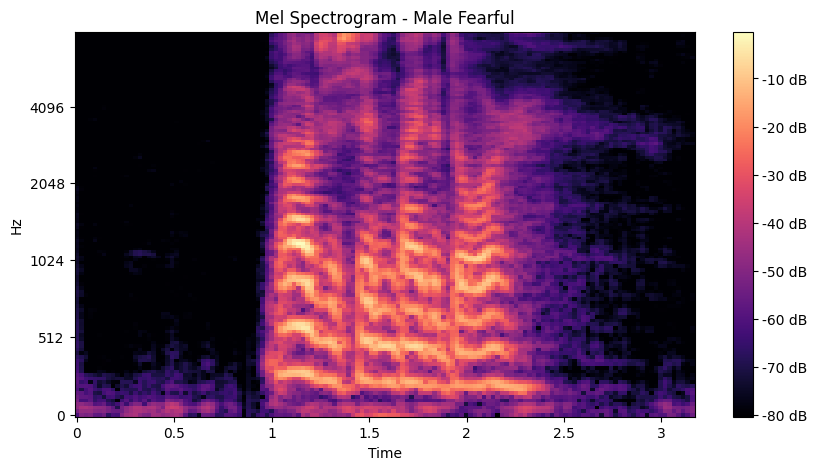

In [27]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Fearful')
plt.colorbar(format='%+2.0f dB');

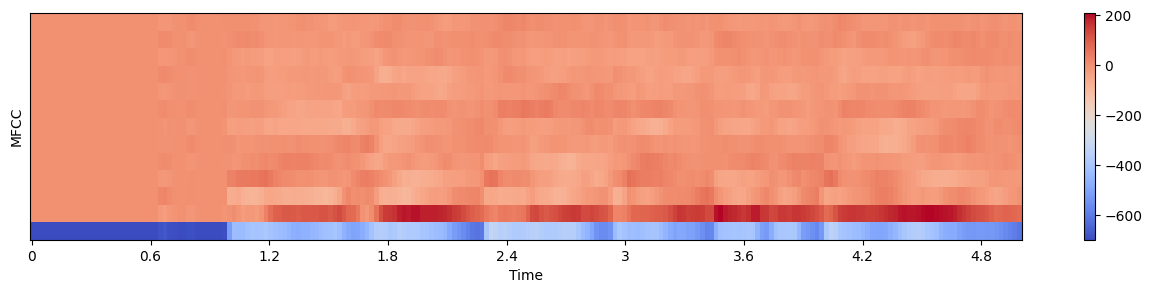

In [28]:
# Gender - Female; Emotion - Angry 
path = RAVD + 'Actor_18/03-01-05-01-01-01-18.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

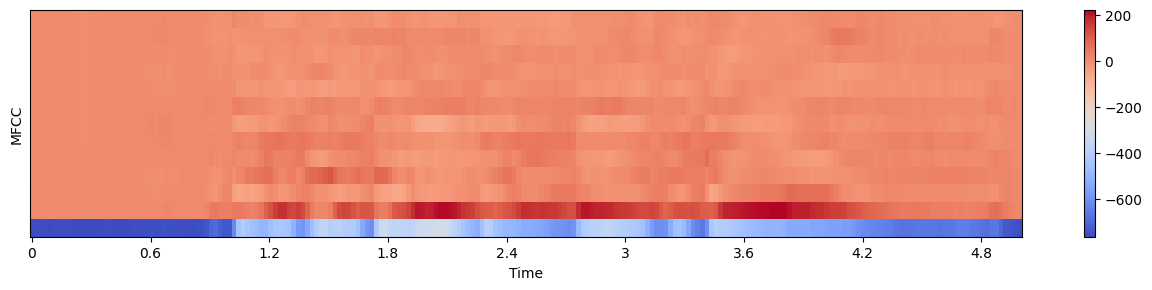

In [29]:
# Gender - Male; Emotion - Angry 
path = RAVD + 'Actor_17/03-01-05-01-01-02-17.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


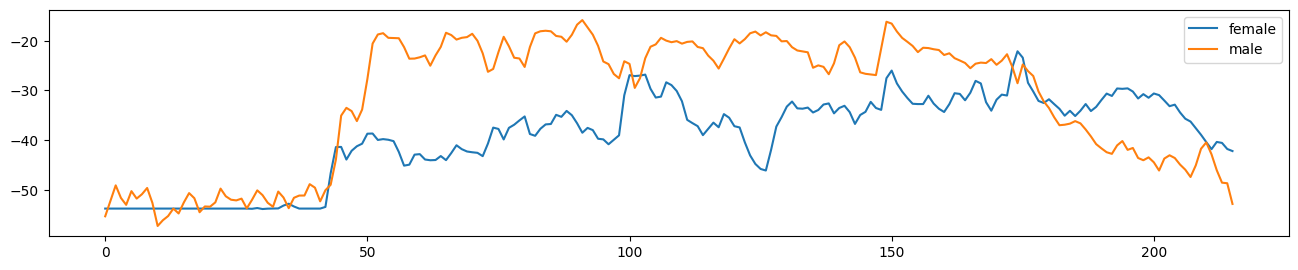

In [30]:
# Gender - Female; Emotion - angry
path = RAVD + 'Actor_18/03-01-05-01-01-01-18.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - angry
path = RAVD + 'Actor_17/03-01-05-01-01-02-17.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


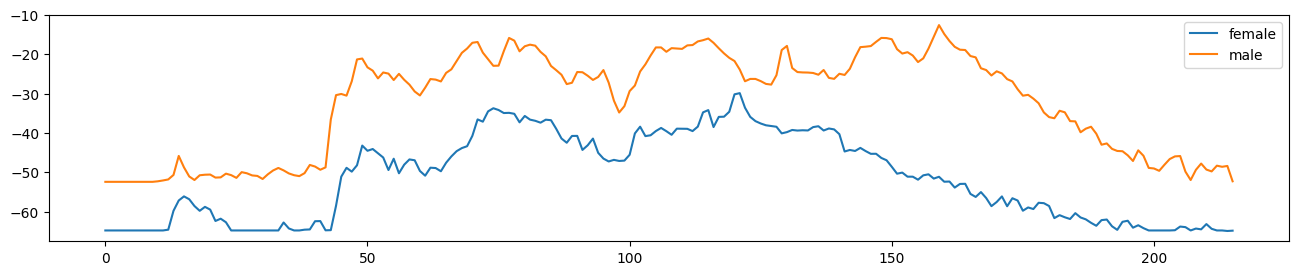

In [31]:
# Gender - Female; Emotion - Surprised
path = RAVD + 'Actor_20/03-01-08-02-01-02-20.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - Surprised
path = RAVD + 'Actor_21/03-01-08-02-01-01-21.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

Again we combine the emotion of suprised male female then again male has higher pitch

# DATA AUGMENTATION

In [32]:
import numpy as np
import librosa
import os

# Load an example audio file
audio_path = os.path.join(RAVD, 'Actor_01', '03-01-01-01-01-01-01.wav')
data, sample_rate = librosa.load(audio_path, sr=None)

# Function to add noise to the audio data
def add_noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.85):
    return librosa.effects.time_stretch(data, rate=rate)

# Function to shift the audio data
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)


# Apply each technique to the example audio
noisy_audio = add_noise(data)
stretched_audio = stretch(data)
shifted_audio = shift(data)
pitched_audio = pitch(data,sample_rate)

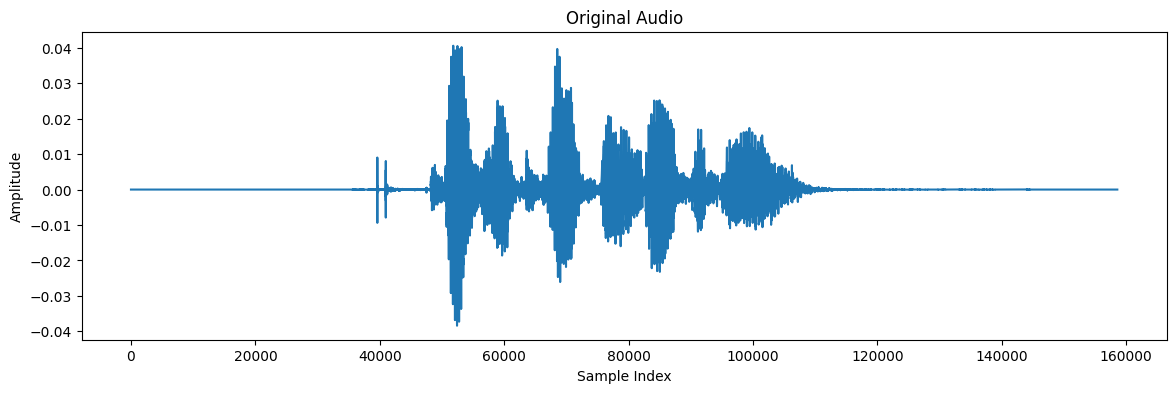

In [33]:
# Visualize original audio using matplotlib
plt.figure(figsize=(14, 4))
plt.plot(data)
plt.title('Original Audio')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Play the original audio
display(Audio(data, rate=sample_rate))


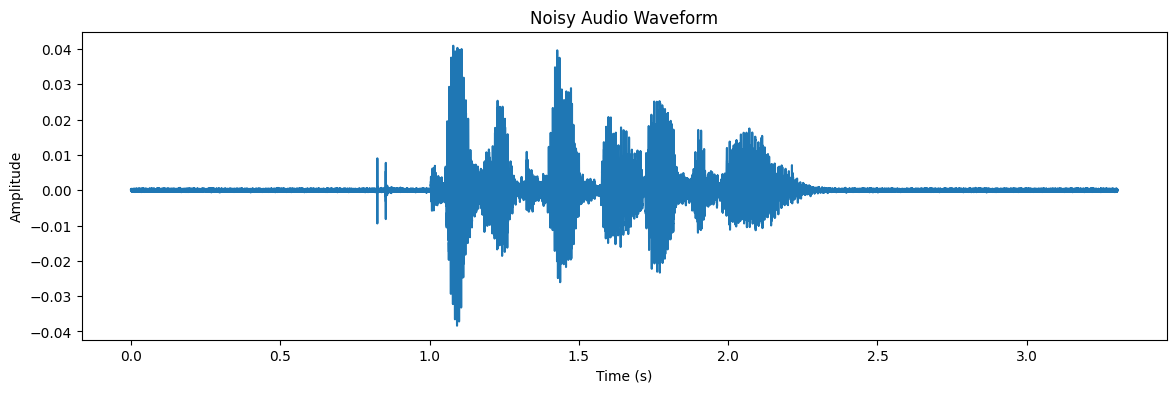

In [34]:
# Visualize noisy audio
plt.figure(figsize=(14, 4))
plt.plot(np.arange(len(noisy_audio)) / sample_rate, noisy_audio)
plt.title('Noisy Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
# Play the noisy audio
display(Audio(noisy_audio, rate=sample_rate))

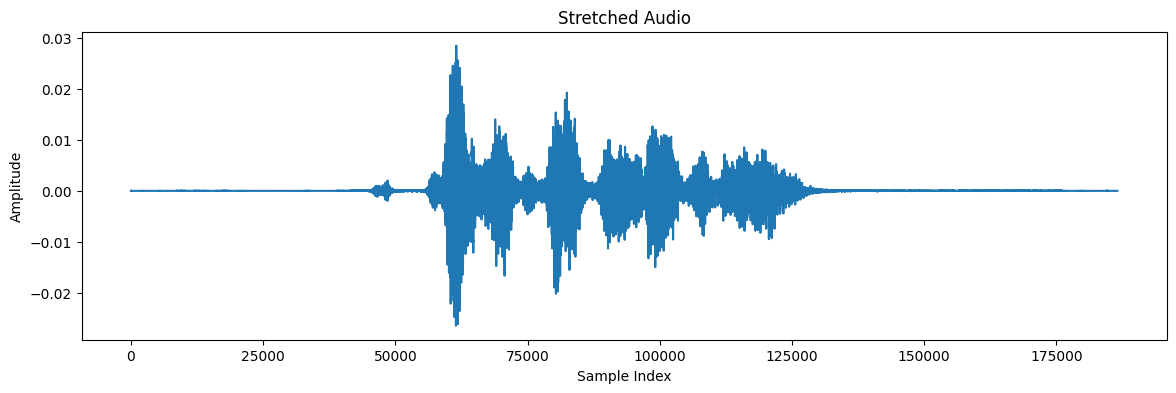

In [35]:
# Visualize stretched audio using matplotlib
plt.figure(figsize=(14, 4))
plt.plot(stretched_audio)
plt.title('Stretched Audio')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()
# Play the stretched audio
display(Audio(stretched_audio, rate=sample_rate))

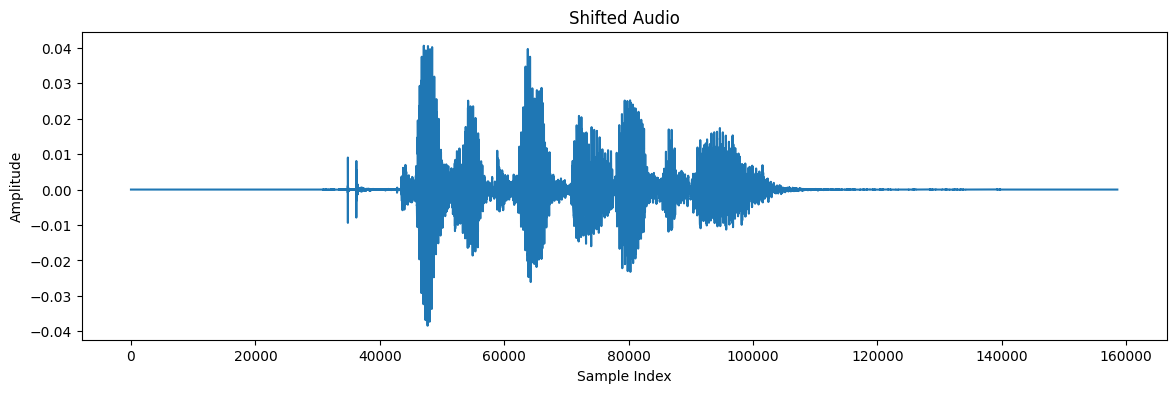

In [36]:
# Visualize shifted audio using matplotlib
plt.figure(figsize=(14, 4))
plt.plot(shifted_audio)
plt.title('Shifted Audio')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()
# Play the shifted audio
display(Audio(shifted_audio, rate=sample_rate))

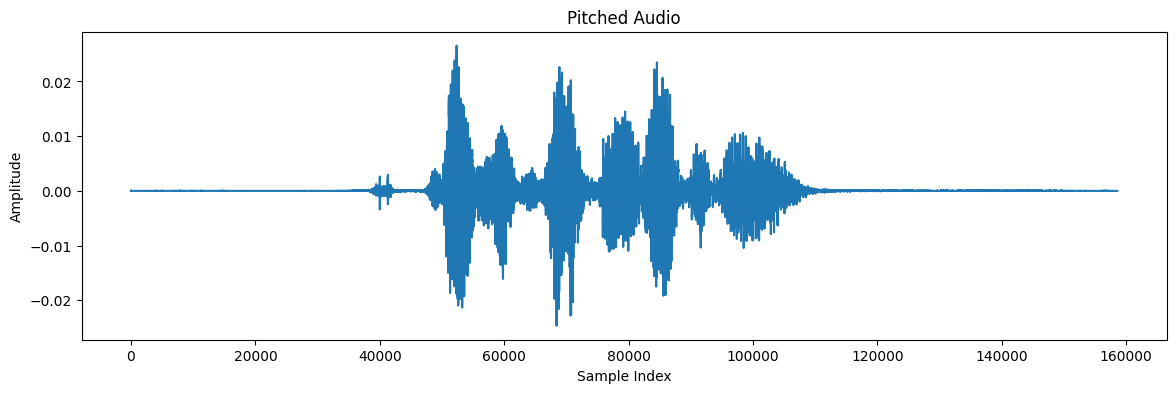

In [37]:
# Visualize pitched audio using matplotlib
plt.figure(figsize=(14, 4))
plt.plot(pitched_audio)
plt.title('Pitched Audio')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Play the pitched audio
display(Audio(pitched_audio, rate=sample_rate))

After listening to all audio we determine to use noise, shift and stretch

# Feature Extraction

In [38]:
def feat_ext(data):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = add_noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [39]:
RAVD_df.head()

labels   source                                               path
0  male_neutral  RAVDESS  dataset/audio_speech_actors_01-24/Actor_01/03-...
1  male_neutral  RAVDESS  dataset/audio_speech_actors_01-24/Actor_01/03-...
2  male_neutral  RAVDESS  dataset/audio_speech_actors_01-24/Actor_01/03-...
3  male_neutral  RAVDESS  dataset/audio_speech_actors_01-24/Actor_01/03-...
4     male_calm  RAVDESS  dataset/audio_speech_actors_01-24/Actor_01/03-...

In [40]:
X, Y = [], []
for path, emotion in zip(RAVD_df['path'], RAVD_df['labels']):
    feature = get_feat(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [41]:
Emotions = pd.DataFrame(X)
Emotions['labels'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

0          1          2         3          4          5         6  \
0 -661.355957  73.815399  -8.907810  5.589618 -12.714312 -16.472002 -7.787406   
1 -524.529670  43.479166  -1.714799 -0.086033 -12.477620 -15.644965 -9.122139   
2 -722.804565  71.607468 -10.167047  4.967080 -15.505339 -16.622055 -8.091254   
3 -651.602356  72.836639 -11.011839  8.916039 -15.799424 -18.176332 -7.837432   
4 -479.098124  33.679970   2.232116 -0.018131 -11.182371 -12.878301 -7.167822   

          7         8         9  ...        11        12        13        14  \
0 -2.398481 -1.231440 -0.460147  ... -6.853086 -4.284072 -9.177079 -3.549598   
1 -3.987850 -0.930791 -2.265360  ... -6.408851 -4.286670 -6.425052 -5.840016   
2 -0.803770 -1.337530 -2.169656  ... -4.618412 -4.716536 -8.182950 -4.341450   
3 -4.701137  0.271246 -2.758466  ... -5.088898 -4.062927 -8.697423 -4.346881   
4 -3.934191  0.348693 -1.930849  ... -5.407074 -3.910011 -6.001230 -4.704040   

         15        16        17        18        19        labels  
0 -8.328416 -0.989786 -6.512727 -5.726095 -3.087596  male_neutral  
1 -4.932403 -2.604833 -4.433888 -4.209644 -2.752914  male_neutral  
2 -8.187670 -1.164873 -8.323941 -5.136322 -5.356240  male_neutral  
3 -7.569177 -1.654461 -5.864536 -5.479126 -3.144874  male_neutral  
4 -3.601351 -2.283877 -2.615774 -3.527578 -2.537468  male_neutral  

[5 rows x 21 columns]

In [42]:
# can use this directly from saved feature .csv file
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

0          1          2         3          4          5         6  \
0 -661.355957  73.815399  -8.907810  5.589618 -12.714312 -16.472002 -7.787406   
1 -524.529670  43.479166  -1.714799 -0.086033 -12.477620 -15.644965 -9.122139   
2 -722.804565  71.607468 -10.167047  4.967080 -15.505339 -16.622055 -8.091254   
3 -651.602356  72.836639 -11.011839  8.916039 -15.799424 -18.176332 -7.837432   
4 -479.098124  33.679970   2.232116 -0.018131 -11.182371 -12.878301 -7.167822   

          7         8         9  ...        11        12        13        14  \
0 -2.398481 -1.231440 -0.460147  ... -6.853086 -4.284072 -9.177079 -3.549598   
1 -3.987850 -0.930791 -2.265360  ... -6.408851 -4.286670 -6.425052 -5.840016   
2 -0.803770 -1.337530 -2.169656  ... -4.618412 -4.716536 -8.182950 -4.341450   
3 -4.701137  0.271246 -2.758466  ... -5.088898 -4.062927 -8.697423 -4.346881   
4 -3.934191  0.348693 -1.930849  ... -5.407074 -3.910011 -6.001230 -4.704040   

         15        16        17        18        19        labels  
0 -8.328416 -0.989786 -6.512727 -5.726095 -3.087596  male_neutral  
1 -4.932403 -2.604833 -4.433888 -4.209644 -2.752914  male_neutral  
2 -8.187670 -1.164873 -8.323941 -5.136322 -5.356240  male_neutral  
3 -7.569177 -1.654461 -5.864536 -5.479126 -3.144874  male_neutral  
4 -3.601351 -2.283877 -2.615774 -3.527578 -2.537468  male_neutral  

[5 rows x 21 columns]

# DATA PREPROCESSING

In [43]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['labels'].values

In [44]:
# As this is a multiclass classification problem onehotencoding our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [45]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 16), (1080, 20), (1080, 16))

In [46]:
# Reshape for LSTM 
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [47]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 16), (1080, 20), (1080, 16))

# MODELS

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier()

DT_Model = DT_Model.fit(x_train,y_train)

y_pred = DT_Model.predict(x_test)

In [49]:
print("Training set score: {:.3f}".format(DT_Model.score(x_train, y_train)))

Training set score: 1.000


In [50]:
from sklearn.metrics import accuracy_score, classification_report
print("Test set score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set score: 0.4046296296296296
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.47      0.42        68
           1       0.56      0.52      0.54        82
           2       0.39      0.48      0.43        61
           3       0.51      0.48      0.50        79
           4       0.44      0.45      0.45        75
           5       0.36      0.45      0.40        38
           6       0.34      0.30      0.32        80
           7       0.59      0.55      0.57        66
           8       0.28      0.30      0.29        64
           9       0.57      0.49      0.53        77
          10       0.31      0.27      0.29        74
          11       0.31      0.35      0.33        72
          12       0.38      0.32      0.34        66
          13       0.27      0.26      0.27        34
          14       0.39      0.39      0.39        71
          15       0.32      0.33      0.32        73

   micro avg       0.

overfitting ----> 39%

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model=KNeighborsClassifier(n_neighbors=5)
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred=KNN_Model.predict(x_test)
print("Training set score: {:.3f}".format(KNN_Model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(KNN_Model.score(x_test, y_test)))

Training set score: 0.678
Test set score: 0.530


Using KNN in our dataset the overall training is quite good but not for deployment and test accuracy has 51

# MLP CLASSIFIER

In [53]:
from sklearn.neural_network import MLPClassifier
MLP_Model=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
MLP_Model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [54]:
print("Training set score: {:.3f}".format(MLP_Model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(MLP_Model.score(x_test, y_test)))

Training set score: 0.937
Test set score: 0.661


Using MLP Classifier he gave good accuracy in training dataset but not good for our test set, So we did not use for deployment 64

# GRU

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense


GRU_Model = Sequential()
GRU_Model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
GRU_Model.add(Dropout(0.3))
GRU_Model.add(GRU(units=50, return_sequences=True, activation='tanh'))
GRU_Model.add(Dropout(0.3))
GRU_Model.add(GRU(units=50, return_sequences=True, activation='tanh'))
GRU_Model.add(Dropout(0.3))
GRU_Model.add(GRU(units=50, activation='tanh'))
GRU_Model.add(Dropout(0.3))
GRU_Model.add(Dense(units=16))
# Use learning rate schedule without decay parameter
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

GRU_Model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False), 
                loss='mean_squared_error', 
                metrics=['accuracy'])

In [56]:
GRU_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 20, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 20, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 20, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 20, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)                1

In [57]:
GRU_Model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=200)

Epoch 1/100


17/17 [==============================] - 10s 167ms/step - loss: 0.0833 - accuracy: 0.0491 - val_loss: 0.0626 - val_accuracy: 0.0676
Epoch 2/100
17/17 [==============================] - 1s 74ms/step - loss: 0.0700 - accuracy: 0.0827 - val_loss: 0.0593 - val_accuracy: 0.1046
Epoch 3/100
17/17 [==============================] - 1s 72ms/step - loss: 0.0665 - accuracy: 0.0864 - val_loss: 0.0581 - val_accuracy: 0.1139
Epoch 4/100
17/17 [==============================] - 1s 73ms/step - loss: 0.0650 - accuracy: 0.0957 - val_loss: 0.0576 - val_accuracy: 0.1259
Epoch 5/100
17/17 [==============================] - 1s 79ms/step - loss: 0.0642 - accuracy: 0.0923 - val_loss: 0.0573 - val_accuracy: 0.1380
Epoch 6/100
17/17 [==============================] - 1s 79ms/step - loss: 0.0637 - accuracy: 0.0935 - val_loss: 0.0571 - val_accuracy: 0.1472
Epoch 7/100
17/17 [==============================] - 1s 79ms/step - loss: 0.0630 - accuracy: 0.0972 - val_loss: 0.0570 - val_accuracy: 0.1657
Ep

17/17 [==============================] - 2s 89ms/step - loss: 0.0576 - accuracy: 0.1611 - val_loss: 0.0560 - val_accuracy: 0.2269
Epoch 56/100
17/17 [==============================] - 1s 88ms/step - loss: 0.0578 - accuracy: 0.1485 - val_loss: 0.0560 - val_accuracy: 0.2269
Epoch 57/100
17/17 [==============================] - 1s 86ms/step - loss: 0.0578 - accuracy: 0.1472 - val_loss: 0.0560 - val_accuracy: 0.2231
Epoch 58/100
17/17 [==============================] - 1s 88ms/step - loss: 0.0577 - accuracy: 0.1503 - val_loss: 0.0560 - val_accuracy: 0.2259
Epoch 59/100
17/17 [==============================] - 1s 83ms/step - loss: 0.0576 - accuracy: 0.1497 - val_loss: 0.0560 - val_accuracy: 0.2231
Epoch 60/100
17/17 [==============================] - 1s 82ms/step - loss: 0.0576 - accuracy: 0.1457 - val_loss: 0.0560 - val_accuracy: 0.2213
Epoch 61/100
17/17 [==============================] - 1s 82ms/step - loss: 0.0577 - accuracy: 0.1478 - val_loss: 0.0560 - val_accuracy: 0.2185
Epoch 62/100

In [58]:
print("Accuracy of our model on test data : " , GRU_Model.evaluate(X_test,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 10ms/step - loss: 0.0558 - accuracy: 0.2296
Accuracy of our model on test data :  22.962963581085205 %


GRU(Gated Recurrent Unit) is important when we use speech dataset but in this model, we don't have good accuracy in training as well as testing so we do not take for further deployment

# LSTM

In [59]:
LSTM_Model=Sequential()
LSTM_Model.add(LSTM(70,return_sequences=True,input_shape=(20,1)))
LSTM_Model.add(LSTM(50,return_sequences=True))
LSTM_Model.add(LSTM(60))
LSTM_Model.add(Dense(16))
LSTM_Model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [60]:
LSTM_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 70)            20160     
                                                                 
 lstm_1 (LSTM)               (None, 20, 50)            24200     
                                                                 
 lstm_2 (LSTM)               (None, 60)                26640     
                                                                 
 dense_1 (Dense)             (None, 16)                976       
                                                                 
Total params: 71976 (281.16 KB)
Trainable params: 71976 (281.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
LSTM_Model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=65,verbose=1)

Epoch 1/100
50/50 [==============================] - 8s 56ms/step - loss: 0.0569 - accuracy: 0.1713 - val_loss: 0.0544 - val_accuracy: 0.2435
Epoch 2/100
50/50 [==============================] - 1s 29ms/step - loss: 0.0542 - accuracy: 0.2401 - val_loss: 0.0534 - val_accuracy: 0.2556
Epoch 3/100
50/50 [==============================] - 1s 29ms/step - loss: 0.0532 - accuracy: 0.2519 - val_loss: 0.0520 - val_accuracy: 0.2824
Epoch 4/100
50/50 [==============================] - 1s 29ms/step - loss: 0.0524 - accuracy: 0.2784 - val_loss: 0.0510 - val_accuracy: 0.3102
Epoch 5/100
50/50 [==============================] - 1s 29ms/step - loss: 0.0516 - accuracy: 0.2932 - val_loss: 0.0508 - val_accuracy: 0.3352
Epoch 6/100
50/50 [==============================] - 1s 29ms/step - loss: 0.0508 - accuracy: 0.3090 - val_loss: 0.0502 - val_accuracy: 0.3287
Epoch 7/100
50/50 [==============================] - 2s 31ms/step - loss: 0.0503 - accuracy: 0.3207 - val_loss: 0.0499 - val_accuracy: 0.3435
Epoch 

50/50 [==============================] - 1s 28ms/step - loss: 0.0190 - accuracy: 0.8519 - val_loss: 0.0364 - val_accuracy: 0.6157
Epoch 59/100
50/50 [==============================] - 1s 28ms/step - loss: 0.0188 - accuracy: 0.8444 - val_loss: 0.0358 - val_accuracy: 0.6194
Epoch 60/100
50/50 [==============================] - 2s 32ms/step - loss: 0.0176 - accuracy: 0.8642 - val_loss: 0.0367 - val_accuracy: 0.6120
Epoch 61/100
50/50 [==============================] - 2s 33ms/step - loss: 0.0171 - accuracy: 0.8664 - val_loss: 0.0361 - val_accuracy: 0.6259
Epoch 62/100
50/50 [==============================] - 2s 33ms/step - loss: 0.0169 - accuracy: 0.8802 - val_loss: 0.0360 - val_accuracy: 0.6231
Epoch 63/100
50/50 [==============================] - 1s 28ms/step - loss: 0.0169 - accuracy: 0.8728 - val_loss: 0.0363 - val_accuracy: 0.6185
Epoch 64/100
50/50 [==============================] - 1s 28ms/step - loss: 0.0158 - accuracy: 0.8809 - val_loss: 0.0362 - val_accuracy: 0.6028
Epoch 65/100

In [62]:
print("Accuracy of our model on test data : " , LSTM_Model.evaluate(X_test,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 8ms/step - loss: 0.0356 - accuracy: 0.6389
Accuracy of our model on test data :  63.88888955116272 %


So, After all, the model ran we use LSTM is important when using sequence data like speech, So using this it ran good on train set but in the test has not good

# CNN

In [63]:
#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((3240, 20, 1), (3240, 16), (1080, 20, 1), (1080, 16))

In [64]:
#CNN
import tensorflow as tf 
CNN_Model = Sequential()
CNN_Model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
CNN_Model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
CNN_Model.add(BatchNormalization())

CNN_Model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
CNN_Model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
CNN_Model.add(BatchNormalization())

CNN_Model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
CNN_Model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
CNN_Model.add(BatchNormalization())

CNN_Model.add(LSTM(256, return_sequences=True))

CNN_Model.add(LSTM(128))

CNN_Model.add(Dense(128, activation='relu'))
CNN_Model.add(Dropout(0.5))

CNN_Model.add(Dense(64, activation='relu'))
CNN_Model.add(Dropout(0.5))

CNN_Model.add(Dense(32, activation='relu'))
CNN_Model.add(Dropout(0.2))

CNN_Model.add(Dense(16, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
CNN_Model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [65]:
CNN_Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 2048)          12288     
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 2048)          0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 10, 2048)          8192      
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 1024)          10486784  
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 1024)           0         
 g1D)                                                            
                                                      

In [66]:
#CNN
history = CNN_Model.fit(x_traincnn, y_train, batch_size=64, epochs=150, validation_data=(x_testcnn, y_test))

Epoch 1/150
51/51 [==============================] - 53s 931ms/step - loss: 2.7653 - accuracy: 0.0759 - val_loss: 2.7721 - val_accuracy: 0.0833
Epoch 2/150
51/51 [==============================] - 43s 838ms/step - loss: 2.7356 - accuracy: 0.1071 - val_loss: 2.7713 - val_accuracy: 0.0824
Epoch 3/150
51/51 [==============================] - 43s 853ms/step - loss: 2.7067 - accuracy: 0.1204 - val_loss: 2.7653 - val_accuracy: 0.0713
Epoch 4/150
51/51 [==============================] - 44s 861ms/step - loss: 2.6528 - accuracy: 0.1377 - val_loss: 2.7545 - val_accuracy: 0.0898
Epoch 5/150
51/51 [==============================] - 44s 857ms/step - loss: 2.5994 - accuracy: 0.1660 - val_loss: 2.7603 - val_accuracy: 0.1028
Epoch 6/150
51/51 [==============================] - 44s 861ms/step - loss: 2.5263 - accuracy: 0.1870 - val_loss: 2.7776 - val_accuracy: 0.0898
Epoch 7/150
51/51 [==============================] - 44s 853ms/step - loss: 2.4554 - accuracy: 0.2077 - val_loss: 2.6908 - val_accuracy:

51/51 [==============================] - 46s 898ms/step - loss: 0.3574 - accuracy: 0.8898 - val_loss: 1.0336 - val_accuracy: 0.7944
Epoch 58/150
51/51 [==============================] - 46s 911ms/step - loss: 0.3120 - accuracy: 0.8994 - val_loss: 0.8837 - val_accuracy: 0.8250
Epoch 59/150
51/51 [==============================] - 44s 864ms/step - loss: 0.2598 - accuracy: 0.9142 - val_loss: 0.8878 - val_accuracy: 0.8370
Epoch 60/150
51/51 [==============================] - 45s 885ms/step - loss: 0.2804 - accuracy: 0.9037 - val_loss: 1.0644 - val_accuracy: 0.8102
Epoch 61/150
51/51 [==============================] - 43s 840ms/step - loss: 0.2873 - accuracy: 0.9040 - val_loss: 0.9733 - val_accuracy: 0.8167
Epoch 62/150
51/51 [==============================] - 44s 853ms/step - loss: 0.2807 - accuracy: 0.9127 - val_loss: 1.0694 - val_accuracy: 0.8167
Epoch 63/150
51/51 [==============================] - 43s 840ms/step - loss: 0.2711 - accuracy: 0.9120 - val_loss: 1.0188 - val_accuracy: 0.824

51/51 [==============================] - 43s 842ms/step - loss: 0.1235 - accuracy: 0.9580 - val_loss: 1.0350 - val_accuracy: 0.8519
Epoch 114/150
51/51 [==============================] - 42s 833ms/step - loss: 0.1147 - accuracy: 0.9611 - val_loss: 1.0619 - val_accuracy: 0.8509
Epoch 115/150
51/51 [==============================] - 43s 840ms/step - loss: 0.1059 - accuracy: 0.9654 - val_loss: 1.1804 - val_accuracy: 0.8333
Epoch 116/150
51/51 [==============================] - 43s 850ms/step - loss: 0.1209 - accuracy: 0.9639 - val_loss: 1.1577 - val_accuracy: 0.8398
Epoch 117/150
51/51 [==============================] - 43s 847ms/step - loss: 0.1259 - accuracy: 0.9608 - val_loss: 1.0963 - val_accuracy: 0.8463
Epoch 118/150
51/51 [==============================] - 43s 833ms/step - loss: 0.1166 - accuracy: 0.9633 - val_loss: 1.1425 - val_accuracy: 0.8417
Epoch 119/150
51/51 [==============================] - 43s 840ms/step - loss: 0.1817 - accuracy: 0.9556 - val_loss: 1.1866 - val_accuracy:

In [67]:
#CNN
print("Accuracy of our model on test data : " , CNN_Model.evaluate(x_testcnn,y_test)[1]*100 , "%")

34/34 [==============================] - 3s 101ms/step - loss: 1.1021 - accuracy: 0.8574
Accuracy of our model on test data :  85.74073910713196 %


# Loss Accuracy Plot Using CNN

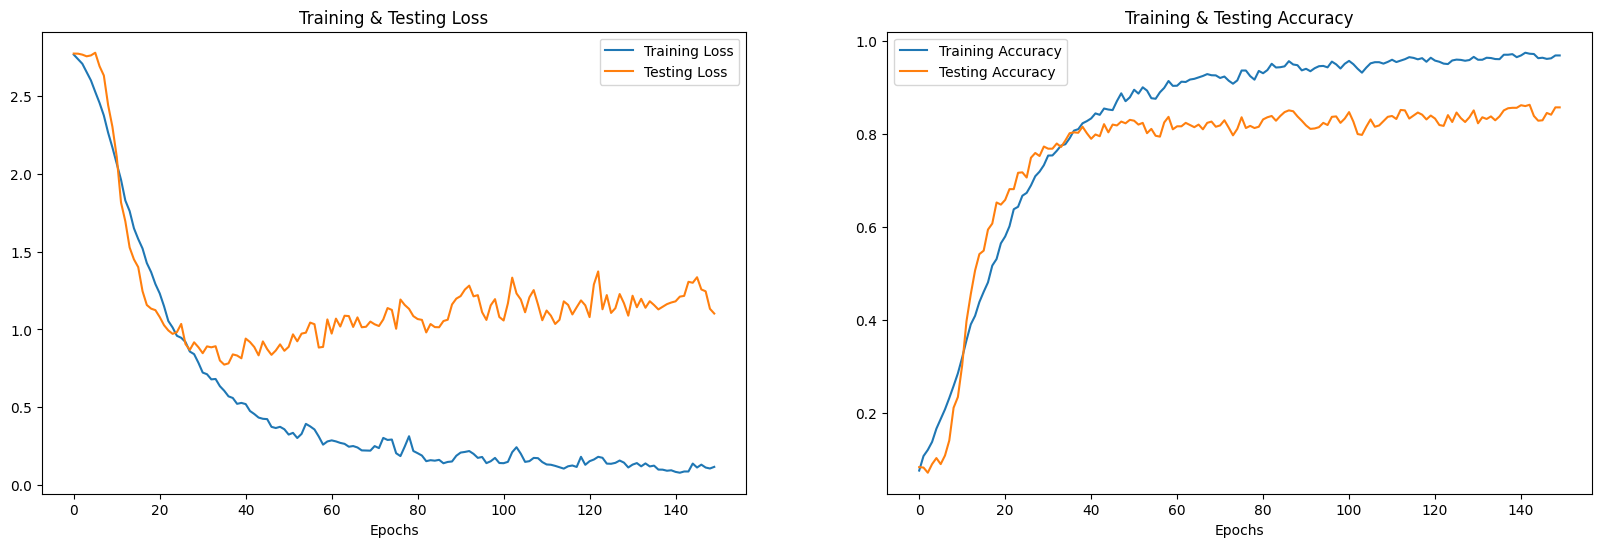

In [68]:
#CNN
epochs = [i for i in range(150)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [69]:
#CNN
pred_test = CNN_Model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

34/34 [==============================] - 4s 83ms/step


Predicted Labels     Actual Labels
0    female_fearful    female_fearful
1        male_angry        male_angry
2    female_fearful    female_fearful
3       female_calm       female_calm
4      female_angry      female_angry
5  female_surprised  female_surprised
6      male_fearful      male_fearful
7        male_happy        male_happy
8    female_fearful    female_fearful
9          male_sad          male_sad

# Confusion Matrix Using CNN

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test.flatten(), y_pred.flatten())

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[62  0  0  0  0  3  0  1  0  0  0  1  0  0  0  1]
 [ 0 81  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 52  2  1  2  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 70  1  0  5  2  0  0  0  0  0  0  0  0]
 [ 1  0  3  3 63  1  3  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 36  2  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  1  1  0 71  0  0  0  0  2  0  0  1  0]
 [ 0  0  1  1  3  0  0 60  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 56  0  4  2  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 68  1  0  2  3  3  0]
 [ 0  0  0  0  0  1  0  0  1  1 57  4  1  2  2  5]
 [ 0  0  0  0  0  0  0  1  0  1  5 59  0  1  3  2]
 [ 0  0  0  0  0  0  0  0  1  0  1  3 55  1  3  2]
 [ 0  0  0  0  0  0  0  0  0  5  2  0  0 24  3  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  4  4  5 54  2]
 [ 1  0  1  1  1  0  0  1  0  0  1  1  5  1  2 58]]


# Classification Report Using CNN

In [71]:
class_report = classification_report(y_test.flatten(), y_pred.flatten())
print("\nClassification Report:")
print(class_report)


Classification Report:
                  precision    recall  f1-score   support

    female_angry       0.97      0.91      0.94        68
     female_calm       0.98      0.99      0.98        82
  female_disgust       0.87      0.85      0.86        61
  female_fearful       0.90      0.89      0.89        79
    female_happy       0.90      0.84      0.87        75
  female_neutral       0.82      0.95      0.88        38
      female_sad       0.84      0.89      0.86        80
female_surprised       0.92      0.91      0.92        66
      male_angry       0.95      0.88      0.91        64
       male_calm       0.89      0.88      0.89        77
    male_disgust       0.79      0.77      0.78        74
    male_fearful       0.78      0.82      0.80        72
      male_happy       0.82      0.83      0.83        66
    male_neutral       0.65      0.71      0.68        34
        male_sad       0.74      0.76      0.75        71
  male_surprised       0.82      0.79      0.81

# SAVING THE MODEL

In [72]:
import joblib

# Save the model
model_filename = 'cnn_model.joblib'
joblib.dump(CNN_Model, model_filename)

# Check if the file is created and not empty
if os.path.exists(model_filename) and os.path.getsize(model_filename) > 0:
    print("Model saved successfully.")
else:
    print("Error saving the model.")


Model saved successfully.


In [73]:
# Load the model
loaded_model = joblib.load(model_filename)

# Check if the loaded model is the same as the original model
if isinstance(loaded_model, type(CNN_Model)):
    print("Model loaded successfully.")
else:
    print("Error loading the model.")


Model loaded successfully.


In [75]:
import librosa
import numpy as np

audio_file_path = RAVD +'Actor_08/03-01-06-01-01-01-08.wav'

audio_data, sr = librosa.load(audio_file_path, sr=None)

spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr)

input_data = np.expand_dims(spectrogram, axis=0)

# Make predictions
predictions = loaded_model.predict(input_data)

print(predictions)


ValueError: in user code:

    File "C:\Users\Aml Taha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Aml Taha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aml Taha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Aml Taha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\Aml Taha\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Aml Taha\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 20, 1), found shape=(None, 128, 373)
